# Régression Logistique appliquée au jeu de données Titanic

En **apprentissage supervisé**, on distingue les modèles de **régression** (où la variable cible à prédire - *Target* - est continue) des modèles de **classification** (où la variable cible est discrète). Les techniques de classification sont largement utilisées en apprentissage supervisé.

Après avoir vu en détail le modèle de régression linéaire (simple et multivarié), nous allons nous intéresser ici au **modèle de régression logistique** qui fait partie des modèles de classification. 

La régression logistique est une technique prédictive. Elle vise à construire un modèle permettant de prédire / expliquer les valeurs prises par une variable cible (*target noté Y*) qualitative (le plus souvent binaire, on parle alors de régression logistique binaire ; si elle possède plus de 2 modalités, on parle de régression logistique polytomique) à partir d’un ensemble de variables explicatives quantitatives ou qualitatives. 

La régression logistique est une technique très répandu dans de nombreux domaines (ex : marketing, épidémiologie). On peut citer en exemple la prédiction de la survenue d'une maladie (Y = 0 si sain ou 1 si malade) pour un individu en fonction de ses caractéristiques (*features*) (ex: Age, Antécédents médicaux, Surpoids, Tabac,..)


Avec les régressions linéaires, nous avons vu que notre prédicteur était la droite la plus proche possible de notre nuage de points. Dans un modèle logistique binaire, l'objectif est de trouver une ligne (frontière de décision) séparant au mieux les deux classes Y = 0 et Y = 1. Dans l'illustration ci-dessous, on voit qu'une ligne en "S" (fonction Sigmoide) permettait de mieux prédire la probabilité d'appartenance à l'une des 2 classes, contrairement à une droite.

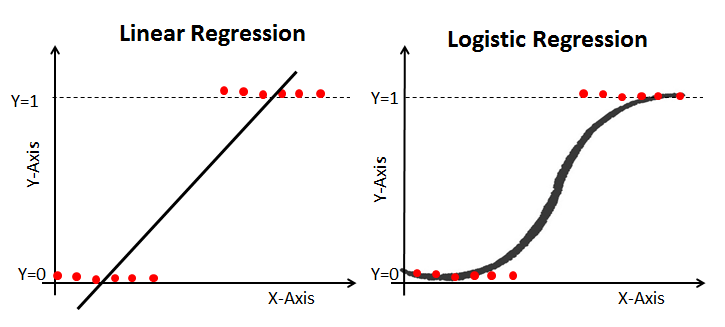

Dans ce notebook, nous allons appliquer le modèle logistique au jeu de données *TITANIC*. On cherche donc à prédire la probabilité de survie (variable cible "Survival") en fonction des caractéristiques des passagers.



### 1. Import des libraries utiles

In [1]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 

from sklearn import preprocessing

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 2. Description du dataset
1. Charger le dataset et afficher sa dimension

2. Afficher les 10 premières lignes de la table

3. Afficher la liste des variables et leurs types


In [2]:
df=pd.read_csv('Titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 ### 2. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable

2. Utiliser `seaborn.heatmap` pour visualiser les lignes présentant des valeurs manquantes


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
p1=((df['Age'].isnull().sum())/len(df['Age']))*100
p2= ((df['Cabin'].isnull().sum())/len(df['Cabin']))*100
p3= 100*((df['Embarked'].isnull().sum())/(len(df['Embarked'])))
print(p1,p2,p3)


19.865319865319865 77.10437710437711 0.22446689113355783


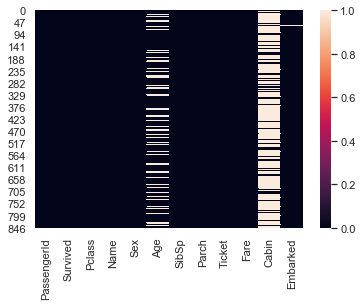

In [6]:
sns.heatmap(df.isnull())



### 3. Traitement des valeurs manquantes
1. Afficher la moyenne et la médiane de la variable `Age`. Commenter les résultats

2. Afficher le `countplot` de la variable `Embarked`. Commenter 

3. A ce stade, nous décidons de remplacer les valeurs manquantes :
    - de la variable `Age` par la valeur médiane
    - de la variable `Embarked` par la modalité `'S'`

**La variable `Cabin`est ignorée car présentant trop de valeurs manquantes**

Afficher l'histogramme de la variable `Age` avant et après traitement. Commenter

4. Appliquer les traitements (et supression) proposés à la question précédente. Vérifier l'absence de valeurs manquantes après traitement.


In [7]:
A= df['Age'].mean()
B= df['Age'].median()
print(A,B)

29.69911764705882 28.0


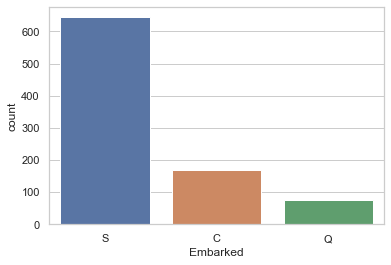

In [8]:
sns.countplot(x='Embarked',data=df)

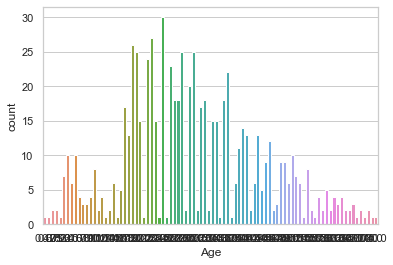

In [9]:
sns.countplot(x='Age',data=df)

In [10]:
medtit=df['Age'].median()

In [11]:
df['Age'].fillna(medtit,inplace=True)

In [12]:
df['Embarked'].fillna('S',inplace=True)


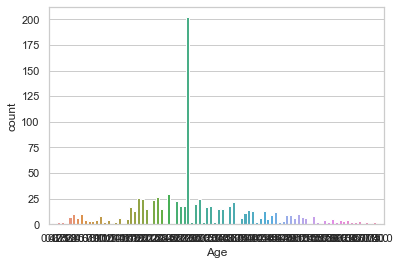

In [13]:
sns.countplot(x='Age',data=df)

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
df.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


 ### 4. Analyse exploratoire - Liaisons entre les variables
 
 1. Afficher le `pairplot`des variables Age et Fare. 
    Analyser la liaison entre ces 2 variables
    Analyser la liaison entre chacune des 2 variables et la variable `Survived`
   
    
 2. Afficher le `cartplot`de la variable `Pclass` en fonction de la variable `Survived`. Commenter les résultats.
 
 3. Afficher les `cartplot`de la variable `Sexe` en fonction de la variable `Survived` et de la variable `Pclass`. Commenter les résultats.
 
 4. **Bonus :** Afficher la HeatMap des corrélations entre toutes les variables du DataFrame à l'aide de la fonction `nominal.associations`du package ` dython`. Commenter les résultats. 

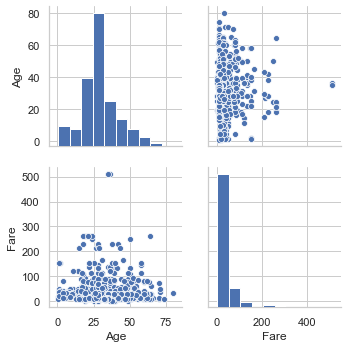

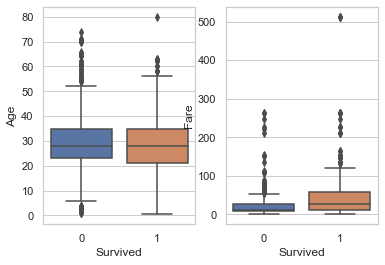

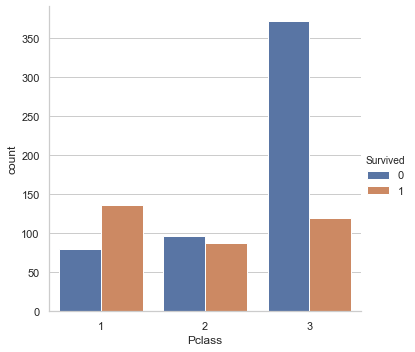

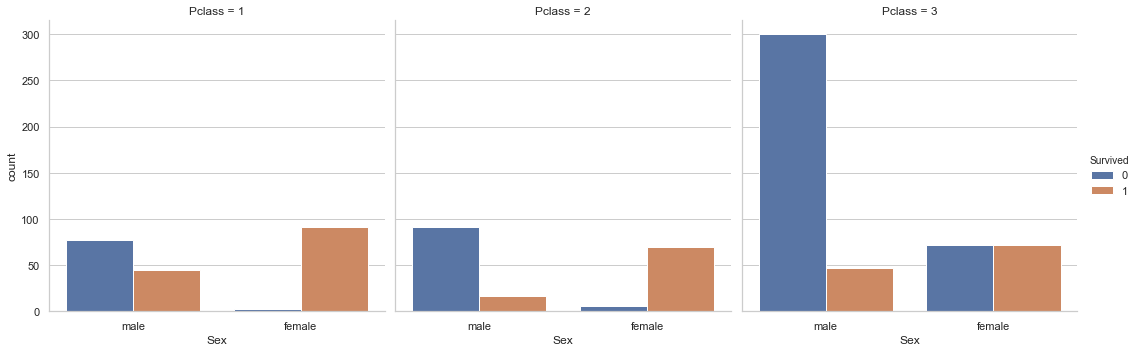

In [16]:
#1
sns.pairplot(df,vars=['Age','Fare'])
plt.show()
plt.subplot(1,2,1)
sns.boxplot('Survived','Age',data=df)
plt.subplot(1,2,2)
sns.boxplot('Survived','Fare',data=df)
plt.show()
#2
sns.catplot('Pclass',kind='count',hue='Survived',data=df)
plt.show()
#3
sns.catplot('Sex',kind='count',hue='Survived',col='Pclass',data=df)
plt.show()

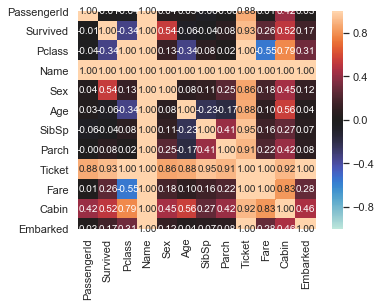

{'corr':              PassengerId  Survived    Pclass  Name       Sex       Age  \
 PassengerId     1.000000 -0.005007 -0.035144   1.0  0.042939  0.034212   
 Survived       -0.005007  1.000000 -0.338481   1.0  0.543351 -0.064910   
 Pclass         -0.035144 -0.338481  1.000000   1.0  0.131900 -0.339898   
 Name            1.000000  1.000000  1.000000   1.0  1.000000  1.000000   
 Sex             0.042939  0.543351  0.131900   1.0  1.000000  0.081163   
 Age             0.034212 -0.064910 -0.339898   1.0  0.081163  1.000000   
 SibSp          -0.057527 -0.035322  0.083081   1.0  0.114631 -0.233296   
 Parch          -0.001652  0.081629  0.018443   1.0  0.245489 -0.172482   
 Ticket          0.875688  0.927549  1.000000   1.0  0.859783  0.878542   
 Fare            0.012658  0.257307 -0.549500   1.0  0.182333  0.096688   
 Cabin           0.419046  0.520076  0.785288   1.0  0.452045  0.560482   
 Embarked        0.034183  0.170707  0.306858   1.0  0.120404  0.040700   
 
               

In [17]:
from dython.nominal import associations
from sklearn.model_selection import train_test_split
associations(df,bias_correction=False)

 ### 5. Traitement des données avant modélisation

1. Créer la variable `'TravelAlone` qui regroupe les modalités des variables `SibSp`et `Parch`

2. Encoder les variables `Pclass`,`Sex`,`Embarked` (création de dummies à l'aide de la fonction `get_dummies()`)


In [18]:
df['TravelAlone'] = df['SibSp'] + df['Parch']
print(df['TravelAlone'])
df

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: TravelAlone, Length: 891, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [19]:
df2=pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'])

In [20]:
df2

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,0,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,3,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,0,0,0,1,1,0,0


 ### 6. Data splitting

 1. Conserver les variables suivantes :
      ["Survived","Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 

    **On constate que pour les variables catégorielles, l'une des modalités (généralement celle la plus représentée) est exclue.** 
   
 
 2. Définir le DataFrame X contenant uniquement les variables explicatives et le DataFrame y contenant la variable "Survived"
 
 Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.3 et random_state à 1 et stratify = y 
    
 Quelle est la signification de ces trois paramètres?
    
 3. Àfficher le tableau de fréquence de la variable `Survived` (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 

In [21]:
Var= ["Survived","Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"]

In [22]:
df2=pd.DataFrame(df2,columns=Var)
df2

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male
0,0,22.0,7.2500,1,0,0,0,1,1
1,1,38.0,71.2833,1,1,0,1,0,0
2,1,26.0,7.9250,0,0,0,0,1,0
3,1,35.0,53.1000,1,1,0,0,1,0
4,0,35.0,8.0500,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,0,1,0,1,1
887,1,19.0,30.0000,0,1,0,0,1,0
888,0,28.0,23.4500,3,0,0,0,1,0
889,1,26.0,30.0000,0,1,0,1,0,1


In [23]:
X=pd.DataFrame(df2,columns=["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"])
X.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male
0,22.0,7.2500,1,0,0,0,1,1
1,38.0,71.2833,1,1,0,1,0,0
2,26.0,7.9250,0,0,0,0,1,0
3,35.0,53.1000,1,1,0,0,1,0
4,35.0,8.0500,0,0,0,0,1,1


In [24]:
y=pd.DataFrame(df2,columns=["Survived"])


In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1,stratify=y)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)


(623, 8) (268, 8)
(623, 1) (268, 1)


In [26]:
pd.DataFrame(y_train.Survived.value_counts())

,Survived
0,384
1,239


In [27]:
pd.DataFrame(y_train.Survived.value_counts(normalize=True)*100)

,Survived
0,61.637239
1,38.362761


In [28]:
pd.DataFrame(y_test.Survived.value_counts())

,Survived
0,165
1,103


In [29]:
pd.DataFrame(y_test.Survived.value_counts(normalize=True)*100)

,Survived
0,61.567164
1,38.432836


 ### 7. Modélisation et Performances

Nous allons à cette stade entraîner notre modèle Logistique en utilisant la fonction `sklearn.linear_model.LogisticRegression`

**Questions théoriques**
1. Que cherche t-on à modéliser?

2. Quelle fonction mathématique est utilisée pour estimer la probabilité de survivre sachant X $p(Y = 1|X)$? 

3. Définir l'Odds (ou la côte)

4. On a vu dans le modèle de régression linéaire simple que le modèle s'écrivait comme suite : 
$Y = \theta_0 + \theta_1 X + \epsilon$ où Y est une variable continue

  En utilisant ce modèle, comment s'écrit Y en fonction de $p(Y = 1|X)$?
  

5. **Bonus** :
    Supposons que nous disposons d'un échantillon de N individus indépendants et pour chaque individu i on a 
    la probabilité d'appartenance à la classe $y_i$ : $P(Y = y_i|X= x_i)$. Quelle est la vraisemblance du modèle?
    Comment sont estimés les paramètres du modèle?

**Questions pratiques**

1. Afficher la DocString de cette fonction avec la commande :
`LogisticRegression.__doc__`

Quel algorithme d'optimisation est utilisé par défaut?

2. **Bonus** : Par défaut, dans LogisticRegression, une pénalité "l2" est utilisée. Quelle est sa signification et quel est son intérêt?




Questions théoriques


1/ On cherche à modéliser la probabilité de survie à partir des variables explicatives. On pourra ensuite prédire la variable y. 

2/ C'est la fonction sigmoïde

3/ Odds = ratio entre la proba de y=1 et celle de y=0 ici. Odds= p/(1-p)

4/ Y=ln(Odds)

3. Instancier un LogisticRegression classifieur (fonction `LogisticRegression()`) et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage
4. Afficher les paramètres du modèle(`.fit().coef_, .fit().intercept_`). Commenter

In [34]:
from sklearn.linear_model import LogisticRegression
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 's

In [36]:
clf = LogisticRegression().fit(X_train, y_train)

C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
X_train

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male
472,33.0,27.7500,3,0,1,0,1,0
597,49.0,0.0000,0,0,0,0,1,1
843,34.5,6.4375,0,0,0,1,0,1
112,22.0,8.0500,0,0,0,0,1,1
869,4.0,11.1333,2,0,0,0,1,1
...,...,...,...,...,...,...,...,...
650,28.0,7.8958,0,0,0,0,1,1
241,28.0,15.5000,1,0,0,0,0,0
265,36.0,10.5000,0,0,1,0,1,1
15,55.0,16.0000,0,0,1,0,1,0


In [37]:
clf.coef_

array([[-0.03890332,  0.00367885, -0.26679524,  1.98895213,  1.11520279,
         0.29439633, -0.22014797, -2.55665912]])

In [40]:
clf.intercept_

array([1.64835099])

In [42]:
#3
'''
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
'''
reg = LogisticRegression()
reg.fit(X_train,y_train)
#4
print(reg.coef_,'\n',reg.intercept_)

[[-0.03890332  0.00367885 -0.26679524  1.98895213  1.11520279  0.29439633
  -0.22014797 -2.55665912]] 
 [1.64835099]


C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#5
Ypred=reg.predict(X_test)
print(Ypred,'\n',type(Ypred))

[0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0] 
 <class 'numpy.ndarray'>


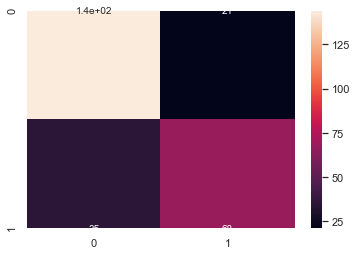

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
#6
'''
matrice de confusion C telle que C_ij nombre d'observations dans le groupe i prédites dans le groupe j
'''
sns.heatmap(confusion_matrix(y_test,Ypred),annot=True)
plt.show()

In [60]:
#7
Ppred=reg.predict_proba(X_test)
Ppred

array([[0.85366006, 0.14633994],
       [0.73415719, 0.26584281],
       [0.85992403, 0.14007597],
       [0.35457215, 0.64542785],
       [0.59013982, 0.40986018],
       [0.8770904 , 0.1229096 ],
       [0.92968416, 0.07031584],
       [0.3570837 , 0.6429163 ],
       [0.160091  , 0.839909  ],
       [0.8994454 , 0.1005546 ],
       [0.74168048, 0.25831952],
       [0.91512207, 0.08487793],
       [0.05198514, 0.94801486],
       [0.03590186, 0.96409814],
       [0.87751334, 0.12248666],
       [0.84245713, 0.15754287],
       [0.43522309, 0.56477691],
       [0.87172202, 0.12827798],
       [0.8676785 , 0.1323215 ],
       [0.86664024, 0.13335976],
       [0.51976766, 0.48023234],
       [0.78231688, 0.21768312],
       [0.07120823, 0.92879177],
       [0.49440783, 0.50559217],
       [0.16102901, 0.83897099],
       [0.25837937, 0.74162063],
       [0.8991789 , 0.1008211 ],
       [0.90541417, 0.09458583],
       [0.86266533, 0.13733467],
       [0.87141832, 0.12858168],
       [0.

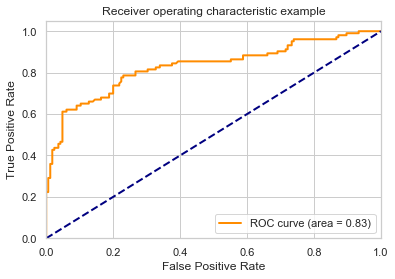

In [59]:
#X_train, X_test, Y_train, Y_test
'''ROC curve'''
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

 

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

 
y_score = reg.decision_function(X_test)

 

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

5. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

6. Définir une matrice de confusion
   Afficher la `heatmap` de la matrice de confusion (fonction `sklearn.metrics.confusion_matrix`). Commenter

7. Faire une prédiction de la probabilité p(Y = 1) à l'aide de la fonction `.predict_proba()`

8. Définir les métriques suivantes : l'Accuracy du modèle, l'AUC, la sensibilité, la spécifité 
    
   Afficher l'Accuracy du modele (`metrics.accuracy_score`)
   Afficher l'AUC
   Afficher la precision et le recall
   Commenter les résultats
   
 9. Définir la courbe ROC
    Afficher la courbe ROC. Interpréter

10. **Bonus**: On repart du DataFrame avant data-splitting. Relancer les calculs précédents en procédant par cross-validation (fonction `cross_val_score()`avec CV = 10). Comparer l'AUC à celui calculé à la question 8. Commenter  

11. **Bonus - Amélioration du modèle** Nous avons pour le moment conserver toutes les variables dans notre modèle. Or certaines peuvent présenter un pouvoir explicatif faible et induire du bruit. A cette étape, on propose de faire relancer les calculs précédents (en entrée: le DataFrame avant datasplitting) en utilisant une méthode récursive de sélection de variable et une cross-validation (fonction `sklearn.feature_selection.RFECV()`). A l'issu de cette étape, on dispose d'une liste de variables sélectionnées et on relance le fitting du modèle et le calcul des performances respectivement sur les bases d'apprentissage et de test.

Comparer vos résultats (en terme de métriques) à ceux sans sélection préalable des variables
